<a href="https://colab.research.google.com/github/rho-selynn/592-intro-to-data-prep/blob/main/01IntroDataPreparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Welcome to Google Colab')

Welcome to Google Colab


In [ ]:
x = 2
y = 3
print(x+y)

5


In [ ]:
print(x)

2


# Basic Linux/Shell commands
More details on this can be found [here](https://missing.csail.mit.edu/2020/shell-tools/).



In [ ]:
!date

Thu Jan 27 22:15:01 UTC 2022


In [ ]:
! ls

sample_data


In [ ]:
! mkdir tempdir 
! ls

sample_data  tempdir


In [ ]:
! pwd

/content


# Python packages

In [ ]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       1.0.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.11.4
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.1.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl 

In [ ]:
# Example of installing external pip package
! pip install trimesh

     |████████████████████████████████| 640 kB 4.4 MB/s 


In [ ]:
import os, sys
from google.colab import drive
# This mouunts your google drive to the current runtime
drive.mount('/content/mnt')
# We define a notebook path
nb_path = '/content/notebooks'
# We create a symbolic link from our drive's default "Colab Notebooks" folder to nb_path
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
# Insert nb path
sys.path.insert(0, nb_path)

Drive already mounted at /content/mnt; to attempt to forcibly remount, call drive.mount("/content/mnt", force_remount=True).


FileExistsError: ignored

In [ ]:
!ls /content/mnt/MyDrive/Colab\ Notebooks/ME\ 592X

01IntroDataPreparation.ipynb  mask_rcnn_mung.ipynb	Untitled0.ipynb
Elephant-1.png		      unet_maize_updated.ipynb
lung.PNG		      Untitled


In [ ]:
!ls /content/mnt/MyDrive/Colab\ Notebooks/ME\ 592X/01IntroDataPrep

Elephant-1.png	lung.PNG  sample_weather.txt


`! pip install package_name # *should* install any package not available`

# Python Intro

## Data Types and Operators

In [ ]:
# list, tuple, dictionaries, sets
a = [1,2,3,4]
b = (1,2,3,4) # tuple
c = {'key1':'apple', 'key2':['orange',2]} # dictionary
d = [1,1,2,3,4,5,4]
print(a[2])
print(b[1]) 
print(c['key1']) # accessing dictionary
print(c['key2'][1]) 
e = set(d)
print(e)

3
2
apple
2
{1, 2, 3, 4, 5}


In [ ]:
# creating lists, use %%timeit magic function for multiline, %timeit for single line
%%timeit
l = []
for i in range(100):
    l.append(i)

100000 loops, best of 5: 8.15 µs per loop


In [ ]:
%timeit a = list(range(100))

The slowest run took 5.34 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 5: 815 ns per loop


In [ ]:

%timeit a = [i for i in range(100)] # list comprehension

100000 loops, best of 5: 3.79 µs per loop


## Classes

In [ ]:
class Model(object):
    # class initialization and attributes
    def __init__(self, params, model_type, name='Neural Network'):
        self.name = name #attribute
        self.params = params
        self.model_type = model_type 
      
    # internal functions denoted by __.__ # magic functions
    # str 
    def __str__(self):
        return 'Readable string : This is a '+ self.model_type + ' ' + self.name + ' with ' + str(self.params) + ' params'

    # representation
    def __repr__(self):
        return self.model_type + ' ' + self.name + ' with ' + str(self.params) + ' params'
    
    # method
    def printParams(self, multiplier):
        print(self.params*multiplier)

In [ ]:
m1 = Model(5, 'Supervised') # could change 'Supervised' to 'LinearRegression' to override

In [ ]:
m1

Supervised Neural Network with 5 params

In [ ]:
print(m1)

Readable string : This is a Supervised Neural Network with 5 params


In [ ]:
m1.name

'Neural Network'

In [ ]:
m1.printParams(10)

50


## Important Python Packages

In [ ]:
import numpy as np
# numpy type vs native python type
x = np.array([1,2,3])
print(x[0].dtype)
print(type(1))

x = np.arange(10)
print(x)

int64
<class 'int'>
[0 1 2 3 4 5 6 7 8 9]


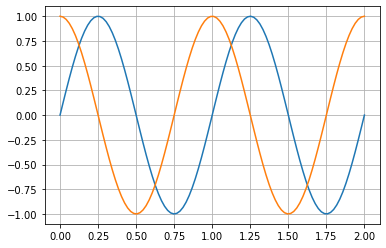

In [ ]:
# plotting example
import matplotlib.pyplot as plt

t = np.linspace(0,2,100)
x = np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)

plt.plot(t,x)
plt.plot(t,y)
plt.grid()
plt.show()

(257, 1130, 3)


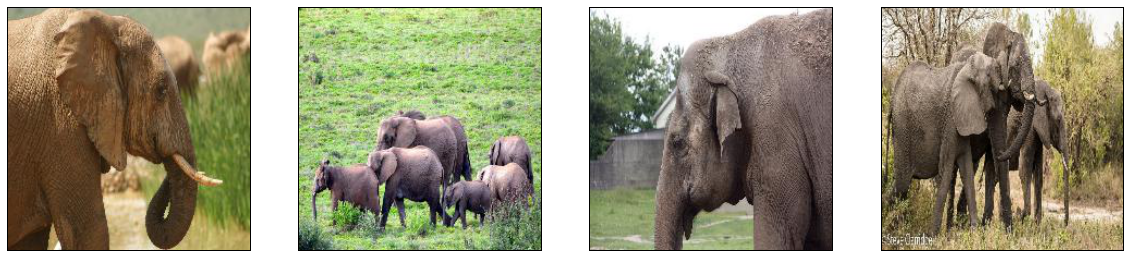

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# last argument 1 is for rgb, 0 is for grayscale
img = cv2.imread('/content/notebooks/ME 592X/01IntroDataPrep/Elephant-1.png',1)
print(img.shape)
cv2_imshow(img)

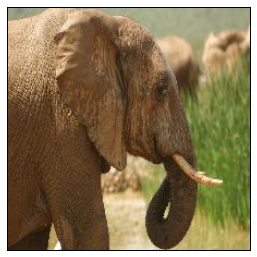

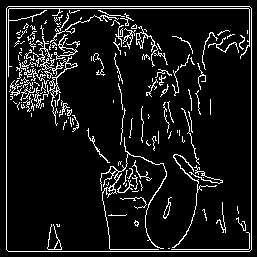

In [ ]:
# source: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html
edges = cv2.Canny(img[:,:257,:],100,200)
cv2_imshow(img[:,:257,:])
cv2_imshow(edges)

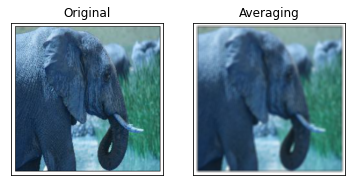

In [ ]:
# try changing kernel size
kernel = np.ones((5,5),np.float32)/25 
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121)
plt.imshow(img[:,:257,:]),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(dst[:,:257,:]),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

# Images

## Loading an Image

In [ ]:
img = cv2.imread('/content/mnt/MyDrive/Colab Notebooks/ME 592X/01IntroDataPrep/lung.PNG',0)
print(img.shape)


(437, 533)


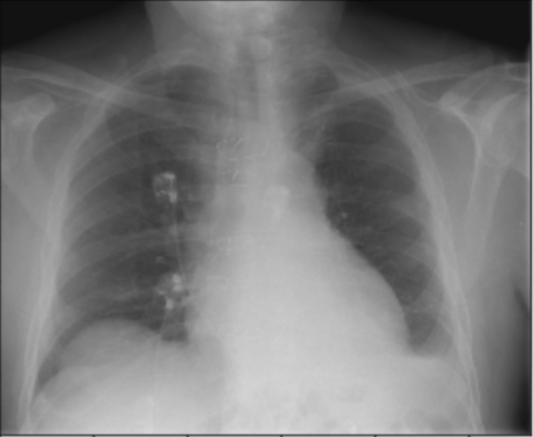

In [ ]:
cv2_imshow(img)

## Histogram Equalization

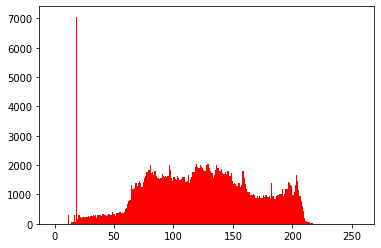

In [ ]:
_ = plt.hist(img.flatten(),256,[0,256], color = 'r')


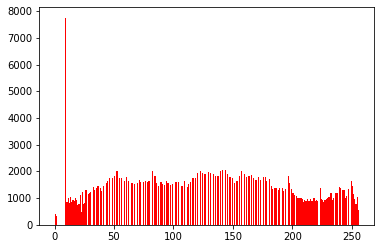

In [ ]:
equ = cv2.equalizeHist(img)
_ = plt.hist(equ.flatten(),256,[0,256], color = 'r')

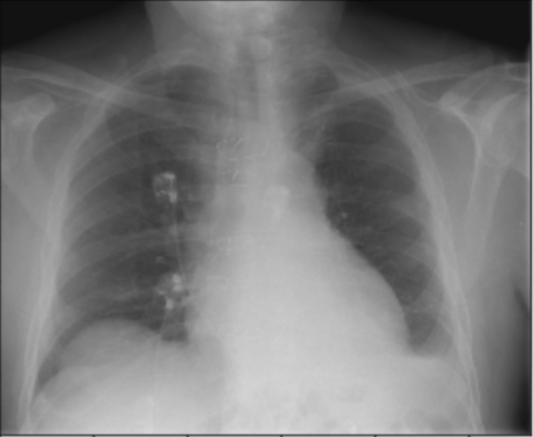

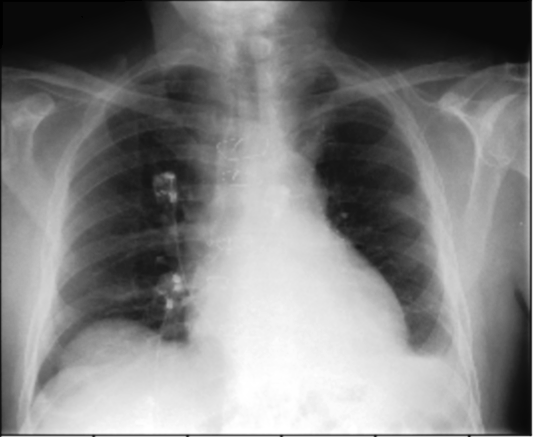

In [ ]:
cv2_imshow(img)
cv2_imshow(equ)

## Denoising

```
# This is formatted as code
```



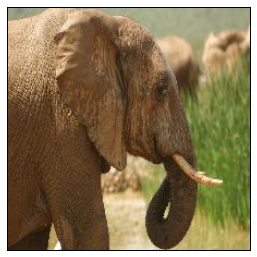

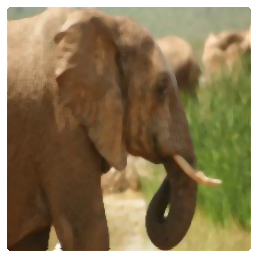

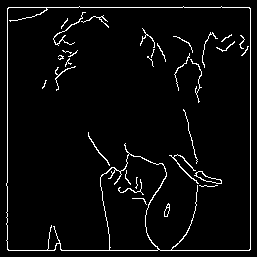

In [ ]:
img = cv2.imread('/content/mnt/MyDrive/Colab Notebooks/ME 592X/01IntroDataPrep/Elephant-1.png')[:,:257,:]
median = cv2.medianBlur(img,5)
cv2_imshow(img)
cv2_imshow(median)
edges = cv2.Canny(median,100,200)
cv2_imshow(edges)

More Details on different image processing operations can be found in:


1.   https://opencv-python-tutroals.readthedocs.io/en/latest/index.html
2.   https://scikit-image.org/docs/stable/auto_examples/index.html



#Time Series

In [ ]:
import pandas as pd
timedata = pd.read_csv('/content/mnt/MyDrive/Colab Notebooks/ME 592X/01IntroDataPrep/sample_weather.txt')


In [ ]:
timedata

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [ ]:
timedata_np = timedata.to_numpy()
print(timedata_np.shape)

(3650, 2)


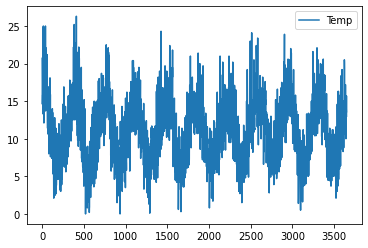

In [ ]:
timedata.plot()

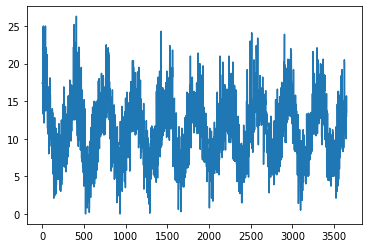

In [ ]:
import scipy.signal
def apply_convolution(sig, window):
    conv = np.repeat([0., 1., 0.], window)
    filtered = scipy.signal.convolve(sig, conv, mode='same') / window
    return filtered

filtered = scipy.signal.medfilt(timedata_np[:,1],15)
# apply_convolution(timedata_np[:,1], 15)
plt.plot(filtered)

More details on time series processing can be found at 
1. https://docs.scipy.org/doc/scipy/reference/signal.html
2. https://dynamictimewarping.github.io/
3. https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html#


# Dimensionality Reduction

In [ ]:
from keras.datasets.mnist import  load_data
_, (images, labels) = load_data()
print(images.shape, labels.shape)



11501568/11490434 [==============================] - 0s 0us/step
(10000, 28, 28) (10000,)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(images.reshape(10000,28*28))


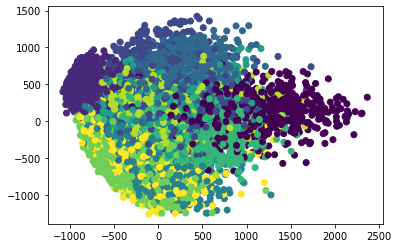

In [ ]:
plt.figure()
plt.scatter(pca_result[:,0], pca_result[:,1], c=labels)


In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(images.reshape(10000,28*28))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 5.613s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 542.948739
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.020798
[t-SNE] KL divergence after 300 iterations: 2.778648


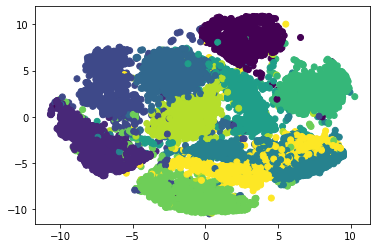

In [ ]:
plt.figure()
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels)

In [ ]:
pca = PCA(n_components=50)
pca_result_int = pca.fit_transform(images.reshape(10000,28*28))
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_int)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.574s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 470.151227
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.026321
[t-SNE] KL divergence after 300 iterations: 2.765946


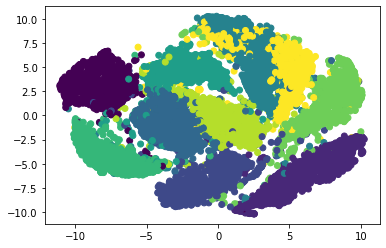

In [ ]:
plt.figure()
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=labels)

2


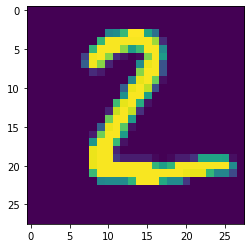

In [ ]:
plt.figure()
plt.imshow(images[1,:,:])
print(labels[1])